In [1]:
import sys
sys.path.append('../..')

from src.var_like import VarLikeModel

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import IPython.display as display

import warnings
warnings.filterwarnings("ignore")

In [3]:
time_serires_data = pd.read_excel('../../data/Learning_data_part2.xlsx')
time_serires_data.head()

,t,TS_0_coord_0,TS_1_coord_0,TS_2_coord_0,TS_3_coord_0,TS_4_coord_0,TS_5_coord_0,TS_6_coord_0,TS_7_coord_0,TS_8_coord_0,...,TS_50_coord_0,TS_51_coord_0,TS_52_coord_0,TS_53_coord_0,TS_54_coord_0,TS_55_coord_0,TS_56_coord_0,TS_57_coord_0,TS_58_coord_0,TS_59_coord_0
0,0,-3.409188,-2.407987,4.336650,-0.373717,-8.233428,-1.870133,-0.167323,-1.511594,-4.261577,...,1.001072,0.999874,1.000519,0.999584,0.999710,1.000714,1.000141,0.998601,1.000978,0.999657
1,1,-1.301141,0.179917,3.420829,-1.431981,-0.943458,3.906801,1.804628,-2.485393,3.172589,...,1.001238,0.998442,1.002101,0.997588,1.000276,1.000275,0.999556,0.998472,1.001694,0.998848
2,2,-2.832516,0.128531,1.317262,4.305178,1.730649,2.562662,-6.652573,-0.298241,-1.593983,...,1.001069,0.997301,1.001905,0.996956,0.999332,1.000806,1.001417,0.999247,1.001115,0.998833
3,3,-3.812846,-3.403033,-2.549219,1.304434,-5.203170,4.553835,0.322669,-0.576871,-2.230504,...,1.001607,0.998654,1.002728,0.995967,0.998169,1.000737,1.002283,0.998968,0.999787,0.997835
4,4,1.223246,4.283249,4.191157,9.180627,-4.221019,3.582291,-0.239433,-3.032084,3.508173,...,1.002264,0.999228,1.002623,0.995078,0.998596,1.002500,1.002029,0.999980,0.998672,0.997843


In [4]:
num_series = time_serires_data.shape[1] - 1
num_series

60

In [5]:
anwser_array = np.empty((num_series, 2))

In [6]:
for series_num in range(1, time_serires_data.shape[1]):
    cur_series = time_serires_data.iloc[:, series_num].values
    cur_series = cur_series.reshape((-1, 1))

    var_model = VarLikeModel(cur_series)
    window_size = 50

    cur_answer = var_model.find_discordance_point(window_size)
    anwser_array[series_num - 1] = cur_answer

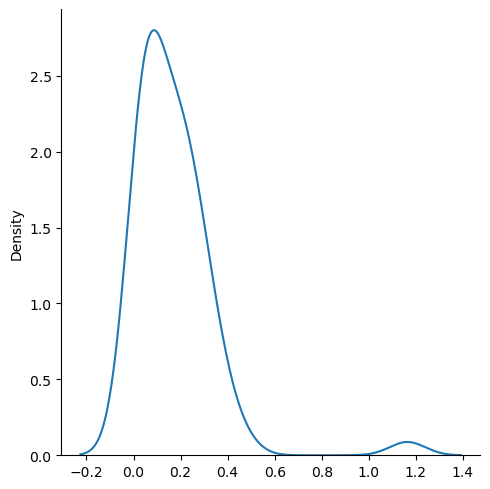

In [7]:
sns.displot(anwser_array[:, 1], kind="kde")

In [8]:
# transform confidence to be summed into 1
confidence = anwser_array[:, 1]
confidence -= 0.4

confidence[confidence < 0] = 1 / np.abs(confidence[confidence < 0])

confidence /= np.sum(confidence)

In [9]:
num_candies = 100000

confidence *= num_candies
confidence = confidence.astype(np.int32)

In [10]:
confidence.sum()

99968

In [11]:
discord_inds = anwser_array[:, 0].astype(np.int32)

In [12]:
answer_frame = pd.DataFrame(data=np.concatenate((discord_inds.reshape((-1, 1)), confidence.reshape((-1, 1))), axis=1), 
                            columns=['T', 'D'],
                )
answer_frame.head()

,T,D
0,-1,930
1,-1,879
2,-1,5616
3,-1,1131
4,-1,2323


In [25]:
answer_frame.to_excel('./answers_part2.xlsx')